In [1]:
# Importing Libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd  #Data manipulation and analysis
import numpy as np   #Performs high level manipulation
import sklearn   # provides efficient tools for predictive data analysis

# Preprocessing purpose
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# For getting the importances
from sklearn.ensemble import RandomForestClassifier

# Feature Extraction
from sklearn.decomposition import PCA

# Splitting Data
from sklearn.model_selection import train_test_split

# For accuracy,Classification Report, Confusion Matrix
from sklearn import metrics

# For training different ML models
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploading datasets for training,testing and prediction
train = pd.read_csv('E:/MajorProject/Code/DataSet1/UNSW_NB15_training-set.csv')
test = pd.read_csv('E:/MajorProject/Code/DataSet1/UNSW_NB15_testing-set.csv')

In [3]:
# Display initial training data
print(train.head())
print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1     

In [4]:
#Display initial Testing Data
print(test.head())
print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [5]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [6]:
test.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [7]:
print('Total attack categories and count in training data')
print()
print(train['attack_cat'].value_counts())

Total attack categories and count in training data

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64


In [8]:
print('Total attack categories and count in testing data')
print()
print(test['attack_cat'].value_counts())

Total attack categories and count in testing data

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64


In [11]:
#id column is of no use so drop it
train.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)
print(list(train.columns))
print()
print(list(test.columns))


['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [13]:
sc_traindf.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,...,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04,8.233200e+04
mean,5.184270e-16,-2.096649e-15,-1.698501e-14,3.414023e-16,-1.044781e-14,2.271449e-15,-1.620620e-13,1.533671e-13,-6.077996e-15,3.152681e-14,...,-4.653541e-14,-1.402275e-13,-3.511471e-14,5.131522e-15,-6.061971e-14,-2.793963e-14,-5.055105e-14,-2.861381e-14,7.580418e-14,4.793738e-15
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.137298e-01,-1.319225e-01,-1.518164e-01,-4.643353e-02,-8.736871e-02,-5.545094e-01,-1.782709e+00,-8.203947e-01,-3.588833e-01,-2.634980e-01,...,-4.683116e-01,-4.501865e-01,-5.655971e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,-6.400328e-01,-7.341074e-01,-1.060701e-01,-1.106883e+00
25%,-2.137281e-01,-1.244551e-01,-1.518164e-01,-4.590918e-02,-8.736871e-02,-5.543169e-01,-1.171948e+00,-8.203947e-01,-3.588210e-01,-2.634980e-01,...,-4.683116e-01,-4.501865e-01,-5.655971e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,-6.400328e-01,-6.441902e-01,-1.060701e-01,-1.106883e+00
50%,-2.107283e-01,-9.458553e-02,-1.345114e-01,-4.346222e-02,-8.619357e-02,-5.366774e-01,7.194401e-01,-5.718240e-01,-3.556752e-01,-2.626150e-01,...,-4.683116e-01,-4.501865e-01,-3.903909e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,-4.059469e-01,-3.744387e-01,-1.060701e-01,9.034381e-01
75%,-6.101285e-02,-4.978117e-02,-6.529130e-02,-3.911594e-02,-8.105725e-02,1.931121e-01,7.194401e-01,1.339599e+00,3.301660e-03,-2.568711e-01,...,-1.107215e-01,-1.120831e-01,-1.275816e-01,-9.085748e-02,-9.061736e-02,-2.031428e-01,6.222472e-02,1.650644e-01,-1.060701e-01,9.034381e-01
max,1.252400e+01,7.935848e+01,9.518155e+01,8.359169e+01,9.668083e+01,6.174084e+00,7.292910e-01,1.348170e+00,2.893044e+01,8.437392e+00,...,6.445097e+00,5.804726e+00,4.865795e+00,2.184603e+01,2.153462e+01,2.484858e+01,6.265499e+00,4.750840e+00,9.427730e+00,9.034381e-01


In [14]:
sc_testdf.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,...,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05
mean,-1.812239e-15,-6.961742e-14,-1.543809e-13,3.172949e-15,5.636632e-14,-1.182600e-13,7.373804e-13,-1.607681e-13,-8.909766e-15,8.841831e-14,...,1.736095e-13,-4.217405e-13,3.042908e-15,8.853645e-14,8.853645e-14,1.800571e-14,6.425320e-14,1.062770e-12,5.739143e-14,-3.285849e-13
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.097747e-01,-1.409822e-01,-1.720474e-01,-5.044967e-02,-1.039229e-01,-5.768192e-01,-1.744196e+00,-7.204059e-01,-3.899726e-01,-2.772081e-01,...,-5.447364e-01,-5.543732e-01,-7.055286e-01,-1.185902e-01,-1.185902e-01,-1.897681e-01,-7.157137e-01,-7.530740e-01,-1.265080e-01,-1.459825e+00
25%,-2.097735e-01,-1.336769e-01,-1.720474e-01,-4.995758e-02,-1.039229e-01,-5.766210e-01,-1.141901e+00,-7.204059e-01,-3.899033e-01,-2.772081e-01,...,-5.447364e-01,-5.543732e-01,-7.055286e-01,-1.185902e-01,-1.185902e-01,-1.897681e-01,-5.955426e-01,-6.601106e-01,-1.265080e-01,-1.459825e+00
50%,-2.095306e-01,-1.336769e-01,-1.539081e-01,-4.814944e-02,-1.027813e-01,-5.573162e-01,7.232680e-01,-4.579780e-01,-3.853023e-01,-2.766105e-01,...,-5.447364e-01,-5.543732e-01,-5.229828e-01,-1.185902e-01,-1.185902e-01,-1.897681e-01,-4.753715e-01,-4.741838e-01,-1.265080e-01,6.850136e-01
75%,-1.066813e-01,-6.062410e-02,-8.135096e-02,-4.249614e-02,-9.625167e-02,1.789221e-01,7.232680e-01,1.560002e+00,8.194472e-02,-2.657082e-01,...,-4.766180e-02,-2.085659e-01,2.984733e-01,-1.185902e-01,-1.185902e-01,-1.897681e-01,2.456551e-01,2.695234e-01,-1.265080e-01,6.850136e-01
max,9.049154e+00,7.009933e+01,9.935819e+01,7.413600e+01,1.019160e+02,5.469112e+00,7.329824e-01,1.578100e+00,3.140074e+01,8.983387e+00,...,5.668697e+00,7.226290e+00,5.135937e+00,3.161543e+01,3.161543e+01,4.259369e+01,6.374381e+00,4.917694e+00,7.904641e+00,6.850136e-01


In [16]:
LE = LabelEncoder()

# extract categorical attributes from both training and test sets
obj_train = train.select_dtypes(include=['object']).copy()
obj_test = test.select_dtypes(include=['object']).copy()
#print(obj_train)
#print(obj_pred)

# encode the categorical attributes
LE_obj_train = obj_train.apply(LE.fit_transform)
LE_obj_test = obj_test.apply(LE.fit_transform)

# separate target column from encoded data 
enctrain = LE_obj_train.drop(['attack_cat'], axis=1)
#print(enctrain)
enctest = LE_obj_test.drop(['attack_cat'],axis=1)
#print(encpred)
test_target = test['attack_cat']
#lir_tar_train = LE_obj_train['attack_cat']

In [17]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = train['attack_cat']
train_x.shape

(82332, 43)

In [18]:
test_df = pd.concat([sc_testdf,enctest],axis=1)
test_df.shape

(175341, 43)

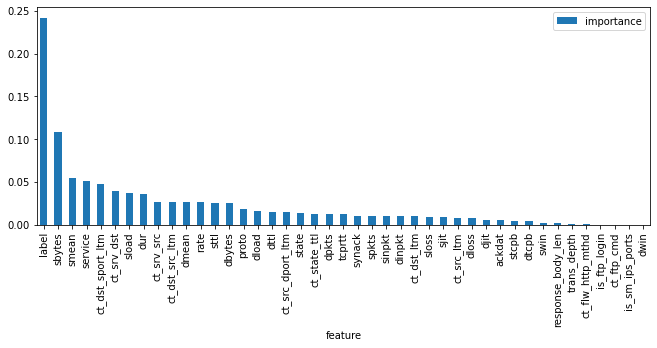

In [21]:
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [22]:
from sklearn.feature_selection import RFE
import itertools
#rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_train = train_x.loc[:, selected_features]
#print()
selected_test = test_df.loc[:, selected_features]

selected_features

['dur',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'sload',
 'dload',
 'smean',
 'dmean',
 'ct_srv_src',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_srv_dst',
 'label',
 'service']

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(selected_train,train_y,train_size=0.70, random_state=2)

In [24]:
#Training different Machine Learning models for comapritive analysis
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0) #Decision Tree Classifier

LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0) #Logistic Regression

BNB_Classifier = BernoulliNB() #Naive Bayes Algorithm

#LIR_Classifier = LinearRegression() #Multi Linear Regression
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

SVM_Classifier = SVC(kernel = 'poly',C = 75) #Support Vector Machine

In [25]:
DTC_Classifier.fit(X_train, Y_train)

LGR_Classifier.fit(X_train, Y_train)

BNB_Classifier.fit(X_train, Y_train)

#LIR_Classifier.fit(mlrx_train, mlry_train)

gradient_booster.fit(X_train,Y_train)

SVM_Classifier.fit(X_train,Y_train)

SVC(C=75, kernel='poly')

In [26]:
models = []
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Logistic Regression', LGR_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Gradient Booster Classifier', gradient_booster))
models.append(('Support Vector Machine', SVM_Classifier))

In [27]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Decision Tree Classifier Model Evaluation ==============================
Model Accuracy:
 0.9387666574125486

Confusion matrix:
 [[   62     3    75   232   100     0     0     0     0     0]
 [   17    55    23   222    92     0     0     0     0     0]
 [   12    11  2126   580    99     0     0     2     0     0]
 [   19    16   981  6645   156     1     0     0     0     0]
 [   18    14   152   435  3611     0     0     2     0     0]
 [    0     0    20     9     0 13182     0     0     0     0]
 [    0     0     0     0     0     0 25902     0     0     0]
 [    0     1   143    93     0     0     0  2224     0     0]
 [    0     0     0     0     0     0     0     0   268     0]
 [    0     0     1     0     0     0     0     0     0    28]]

Classification report:
                 precision    recall  f1-score   support

      Analysis       0.48      0.13      0.21       472
      Backdoor       0.55      0.13      0.22       409
           DoS

In [28]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        


============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.887004048582996

Confusion matrix:
 [[   15     9    42   104    35     0     0     0     0     0]
 [    4     5    15   101    46     2     0     1     0     0]
 [   11     4   646   505    59    20     0     5     8     1]
 [   28    15   655  2309   156    54     0    74    18     5]
 [   24    16    85   281  1400    10     0     6     8     0]
 [    0     4    27    63    22  5536     0     3     5     0]
 [    0     0     0     0     0     0 11098     0     0     0]
 [    0     2    78   105     6     2     0   837     5     0]
 [    0     1    14    20    11     3     0     1    60     0]
 [    0     0     4     4     2     2     0     0     0     3]]

Classification report:
                 precision    recall  f1-score   support

      Analysis       0.18      0.07      0.10       205
      Backdoor       0.09      0.03      0.04       174
           D

In [32]:
import colorama
from colorama import Fore


while(True):
    choice = input(Fore.BLUE+'Enter \'single\' for predicting single value\nEnter \'range\' to predict a range of values : ')
    if(choice=='range'):
        print()
        start,end = map(int,input(Fore.BLUE+'Enter the range for prediction between [0,175340]: ').split())
        prediction = selected_test[start:end]
        tar = test_target[start:end]
        break
    elif(choice=='single'):
        predict_column = int(input(Fore.BLUE+'Enter the value between [0,175340]: '))
        prediction = selected_test[predict_column:predict_column+1]
        tar = test_target[predict_column:predict_column+1]
        break
    else:
        print(Fore.RED+'Enter correct choice')
        
tar = list(tar)
#print(tar)
prediction

Enter 'single' for predicting single value
Enter 'range' to predict a range of values : range

Enter the range for prediction between [0,175340]: 50000 50020


,dur,sbytes,dbytes,rate,sttl,sload,dload,smean,dmean,ct_srv_src,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst,label,service
50000,0.661855,0.035162,-0.103923,-0.576696,0.723268,-0.389861,-0.277208,-0.037873,-0.480703,-0.682570,-0.381470,-0.614256,-0.660111,0.685014,2
50001,-0.209774,-0.049465,-0.103923,0.632367,0.723268,0.459479,-0.277208,-0.179560,-0.480703,-0.589150,-0.381470,-0.522983,-0.567147,0.685014,0
50002,-0.209774,-0.045208,-0.103923,2.446146,0.723268,9.633551,-0.277208,1.637940,-0.480703,-0.775991,-0.554373,-0.614256,-0.753074,0.685014,0
50003,-0.209773,-0.049465,-0.103923,0.094951,0.723268,0.081945,-0.277208,-0.179560,-0.480703,-0.495729,-0.381470,-0.431710,-0.474184,0.685014,0
50004,-0.181591,-0.048539,-0.102684,-0.576455,0.723268,-0.389899,-0.274784,-0.448276,-0.306498,0.064793,-0.554373,-0.705529,-0.753074,0.685014,0
50005,-0.209773,-0.049465,-0.103923,0.094951,0.723268,0.081945,-0.277208,-0.179560,-0.480703,-0.495729,-0.381470,-0.431710,-0.474184,0.685014,0
50006,-0.170780,-0.043606,-0.102057,-0.576460,0.723268,-0.389787,-0.274279,-0.072073,-0.306498,-0.775991,-0.554373,-0.614256,-0.753074,0.685014,5
50007,-0.209773,-0.049465,-0.103923,0.094951,0.723268,0.081945,-0.277208,-0.179560,-0.480703,-0.495729,-0.381470,-0.431710,-0.474184,0.685014,0
50008,-0.070533,-0.047383,-0.101459,-0.576705,0.723268,-0.389949,-0.276073,-0.394533,-0.310369,-0.775991,-0.554373,-0.705529,-0.753074,0.685014,0
50009,-0.209773,-0.049465,-0.103923,0.094951,0.723268,0.081945,-0.277208,-0.179560,-0.480703,-0.495729,-0.381470,-0.431710,-0.474184,0.685014,0


In [33]:
DTC_prediction_result = DTC_Classifier.predict(prediction)
for i in range(len(DTC_prediction_result)):
    print(tar[i]," ",DTC_prediction_result[i])

Fuzzers   DoS
Exploits   Fuzzers
Shellcode   Shellcode
Fuzzers   Fuzzers
DoS   Exploits
Reconnaissance   Fuzzers
DoS   Exploits
DoS   Fuzzers
Reconnaissance   Exploits
Exploits   Fuzzers
Exploits   Exploits
Exploits   Fuzzers
Fuzzers   Fuzzers
Fuzzers   Fuzzers
Exploits   DoS
Reconnaissance   Fuzzers
Fuzzers   Fuzzers
Exploits   Exploits
Exploits   Fuzzers
Fuzzers   Fuzzers
